# Vital nodes identification in complex networks & Centrality

APan 2020/9/10

Diverse algorithms are discussed with karate club network graph.

In [19]:
import networkx as nx
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = "svg"

In [20]:
G = nx.karate_club_graph()
print(nx.info(G))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [21]:
def get_edge_trace(G, node_pos):
    """get edge trace of network G
        
    Parameters
    ----------
    G : nx.Graph

    node_pos : list of coordinates
        nodes position of network G
    
    Returns
    -------
    edge_trace : go.Scatter
        
    """
    edge_x = []
    edge_y = []
    for edge in G.edges():

        x0, y0 = node_pos[edge[0]]
        x1, y1 = node_pos[edge[1]]

        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)  # Line segment
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        mode='lines',
        line=dict(width=0.5, color='grey'),
        hoverinfo='none')

    return edge_trace

In [22]:
def get_node_trace(G, node_pos, marker_text, colorscale, centrality_type, colorscale_title):
    """get node trace of network G
    
    Parameters
    ----------
    G : nx.Graph

    node_pos : [[x,y],...]
        nodes position of network G

    marker_text : list of string
        text for every node

    colorscale : 
        
    centrality_type : string
        node centrality, e.g. "degree", "betweenness"

    colorscale_title : string
        title of colorscale bar
    
    Returns
    -------
    node_trace : go.Scatter
        node trace of network G
    """

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = node_pos[node]
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        hoverinfo='none',
        text=marker_text,
        textposition='top center',
        marker=dict(
            showscale=True,
            colorscale=colorscale,
            reversescale=True,
            color=centrality(G, centrality_type),
            size=10,
            colorbar=dict(
                thickness=15,
                title=colorscale_title,
                xanchor='left',
                titleside='right'),
            line_width=2))

    return node_trace

In [23]:
def get_sub_trace(G, centrality_type):
    """
    compare node centrality on bar

    """
    centralities = centrality(G, centrality_type)

    colors = ['lightblue', ] * len(G)
    colors[0] = 'darkred'
    colors[-1] = 'darkred'

    marker_text = [None] * 34
    marker_text[0] = 'Mr. Hi'   
    marker_text[-1] = 'John A.'

    bar = go.Bar(x=list(G.nodes), y=centralities,
        xaxis="x2", yaxis="y2", 
        marker_color=colors,
        text=marker_text,
        textposition='outside')

    return bar    

In [24]:
def plot_network(G, figure_title='Network graph made with Python', marker_text=None, colorscale='Blackbody', centrality_type=None, colorscale_title='Centrality', seed=None):
    """plot network G.

    Parameters
    ----------
    G : nx.Graph

    figure_title : string
        title of network

    marker_text : list of string
        name of node

    colorscale : string

    color : list of int
        describe the value of node attribute

    color_title : string

    seed : int
        control the layout shape of network

    Returns
    -------
    deg: figure.show()
    """

    node_pos = nx.spring_layout(G, seed=seed)

    edge_trace = get_edge_trace(G, node_pos)
    node_trace = get_node_trace(G, node_pos, marker_text, colorscale, centrality_type, colorscale_title)
    sub_trace = get_sub_trace(G, centrality_type)
    
    data = [edge_trace, node_trace, sub_trace]
    layout = go.Layout(title=dict(text=figure_title,
                                  x=.5),
                       titlefont_size=20,
                       showlegend=False,
                       hovermode='closest',
                       margin=dict(b=20, l=5, r=5, t=40),
                       plot_bgcolor='white',
                       xaxis=dict(showgrid=False, zeroline=False,
                                  showticklabels=False),
                       yaxis=dict(showgrid=False, zeroline=False,
                                  showticklabels=False),
                       xaxis2=dict(domain=[0, 0.45],
                                   anchor='y2'),
                       yaxis2=dict(domain=[0, 0.4],
                                   anchor='x2'))

    fig = go.Figure(data=data, layout=layout)

    fig.show()

In [25]:
def centrality(G, name='degree'):
    """calculate network's centrality
    
    Parameters
    ----------
    G : nx.Graph

    name : {str}, optional
        centrality type (the default is 'degree', which [default_description])

    Returns
    -------
    centrality: list of float
        node's centralities
    """

    if name == 'degree':
        return [d for n, d in G.degree()]

    if name == 'localrank':
        return LocalRank(G)
    
    if name == 'clustering':
        return Clustering(G)
    
    if name == 'corness':
        return Corness(G)
    
    if name == 'closeness1':
        return Closeness1(G)
    
    if name == 'closeness2':
        return Closeness2(G)
    
    if name == 'katz1':
        return Katz1(G)

    if name == 'katz2':
        return Katz2(G)
    
    if name == 'eigenvector1':
        return Eigenvector1(G)
    
    if name == 'eigenvector2':
        return Eigenvector2(G)
    
    if name == 'betweenness':
        return Betweenness(G)
    
    if name == 'pagerank':
        return PageRank(G)
    
    if name == 'HITS1':
        return HITS1(G)
    
    if name == 'HITS2':
        return HITS2(G)

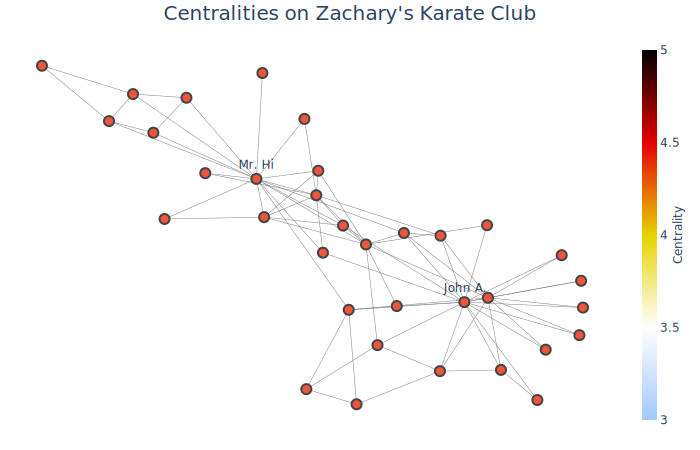

In [26]:
# colorscale options
# 'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
# 'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
# 'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |

marker_text = [None] * 34
marker_text[0] = 'Mr. Hi'
marker_text[-1] = 'John A.'

node_pos = nx.spring_layout(G, seed=1025)

edge_trace = get_edge_trace(G, node_pos)
node_trace = get_node_trace(G, node_pos, marker_text, colorscale='Blackbody', centrality_type=None, colorscale_title='Centrality')
data = [edge_trace, node_trace]

layout = go.Layout(title=dict(text='Centralities on Zachary\'s Karate Club',
                              x=.5),
                   titlefont_size=20,
                   showlegend=False,
                   hovermode='closest',
                   margin=dict(b=20, l=5, r=5, t=40),
                   plot_bgcolor='white',
                   xaxis=dict(showgrid=False, zeroline=False,
                              showticklabels=False),
                   yaxis=dict(showgrid=False, zeroline=False,
                              showticklabels=False))

fig = go.Figure(data=data, layout=layout)

fig.show()

## 1. **Structural centralities**

### 1.1 Neighborhood-based centralities

#### 1.1.1 Degree centrality

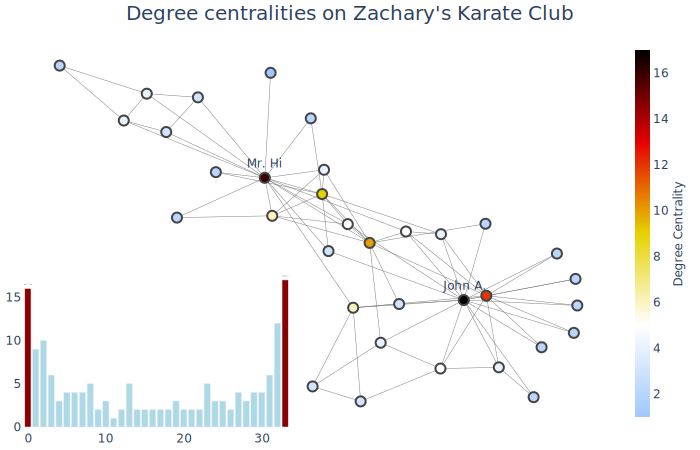

In [27]:
# colorscale options
# 'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
# 'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
# 'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
plot_network(G, figure_title='Degree centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='degree',
             colorscale_title='Degree Centrality',
             seed=1025)

#### 1.1.2 LocalRank centrality

Degree centrality could be less accurate in the evaluation of the influences of nodes since it makes use of very limited information. Chen et al. proposed an effective local-information-based algorithm, LocalRank, which fully considers the information contained in the **fourth-order neighbors** of each node.

$$
LocalRank(i) = \sum_{j \in \Gamma(i)} \sum_{u \in \Gamma(j)} N(u)
$$

In [28]:
def LocalRank(G):
    """LocalRank centrality of network G
    
    """

    LR = []
    N = []
    for i in G.nodes():
        set_neighbor = set()
        for j in G.neighbors(i):
            set_neighbor.add(G.neighbors(j))
        N.append(len(set_neighbor)-1)

    for i in G.nodes():
        lr = 0
        neigh_i = G.neighbors(i)
        for j in neigh_i:
            neigh_j = G.neighbors(j)
            for u in neigh_j:
                lr += N[u]

        LR.append(lr)
    
    return LR

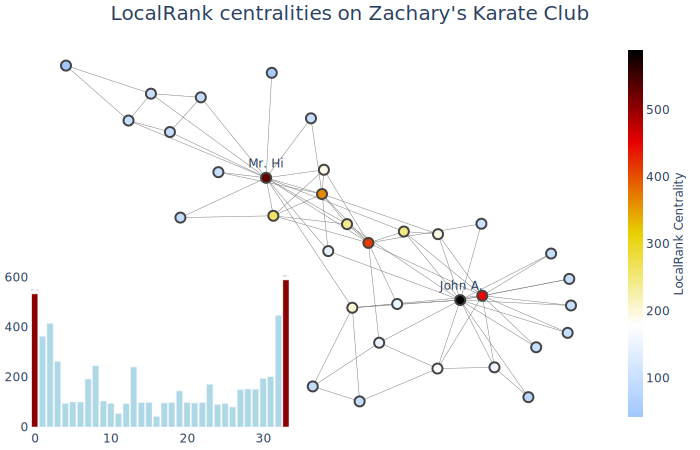

In [29]:
plot_network(G, figure_title='LocalRank centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='localrank',
             colorscale_title='LocalRank Centrality',
             seed=1025)

#### 1.1.3 Clustering centrality

In [30]:
def Clustering(G):
    return list(nx.clustering(G).values())

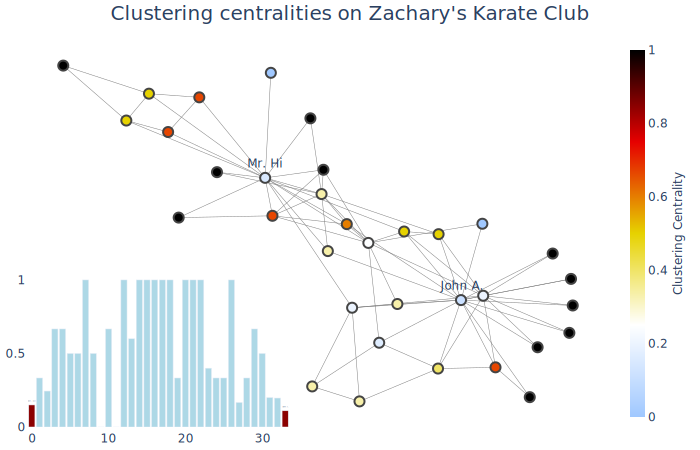

In [31]:
plot_network(G, figure_title='Clustering centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='clustering',
             colorscale_title='Clustering Centrality',
             seed=1025)

#### 1.1.4 Corness centrality

In [32]:
def Corness(G):
    return list(nx.core_number(G).values())

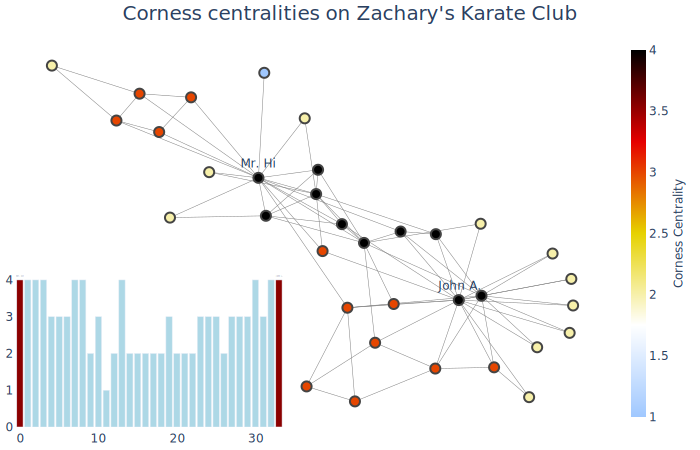

In [33]:
plot_network(G, figure_title='Corness centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='corness',
             colorscale_title='Corness Centrality',
             seed=1025)

### 1.2 Path-based centralities

#### 1.2.1 Closeness centrality

In [34]:
def Closeness1(G):
    closeness_centrality = []
    n = len(G)
    for i in G.nodes():
        sp = list(nx.single_source_shortest_path_length(G, i).values())
        del sp[i]
        closeness_centrality.append((n-1) / sum(sp))
        
    return closeness_centrality

$$
C_i = \frac 1 l_i = \frac{n}{\sum_j d_{ij}}
$$

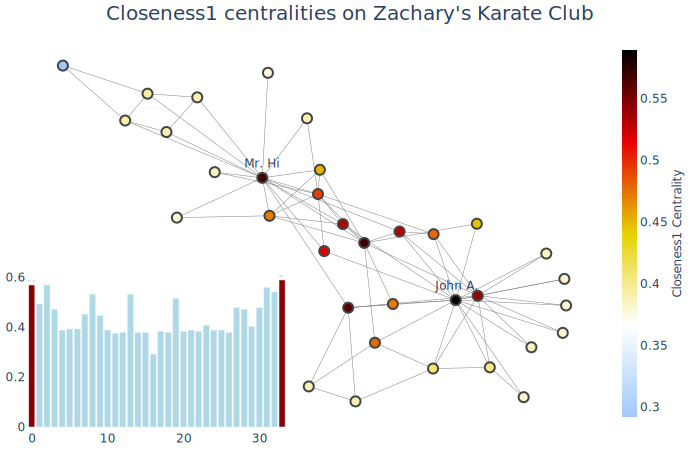

In [35]:
plot_network(G, figure_title='Closeness1 centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='closeness1',
             colorscale_title='Closeness1 Centrality',
             seed=1025)

In [36]:
def Closeness2(G):
    closeness_centrality = []
    n = len(G)
    for i in G.nodes():
        sp = list(nx.single_source_shortest_path_length(G, i).values())
        del sp[0]
        
        closeness_centrality.append(sum([1 / k for k in sp]) / (n-1))
        
    return closeness_centrality

$$
C_{i}^{\prime}=\frac{1}{n-1} \sum_{j(\neq i)} \frac{1}{d_{i j}}
$$

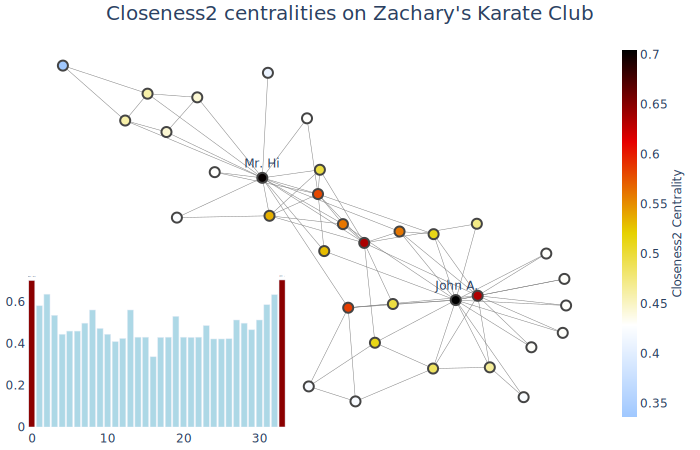

In [37]:
plot_network(G, figure_title='Closeness2 centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='closeness2',
             colorscale_title='Closeness2 Centrality',
             seed=1025)

#### 1.2.2 Katz centrality

`nx.katz_centrality(G)` calculates the convergence of x value using iterative method when $\alpha < 1 / \lambda_1$.
$$
\mathbf{x} = \alpha \mathbf{Ax}+\beta \mathbf{1}
$$

We use `numpy.linalg.inv()` to calculate other $\alpha$ value. However, these x values are meaningless.
$$
\mathbf{x}=\beta(\mathbf{I}-\alpha \mathbf{A})^{-1} \mathbf{1}
$$


In [38]:
import numpy as np
import numpy.linalg

def Katz1(G):
    """get Katz centrality of network G
    
    """
    m = nx.to_numpy_array(G)
    e = numpy.linalg.eigvalsh(m)
    max1, max2 = sorted(e, reverse=True)[:2]

    katz_centrality = nx.katz_centrality(G, 1 / max1 - 0.01)

    return list(katz_centrality.values())


def Katz2(G):
    """get Katz centrality of network G
    
    """
    m = nx.to_numpy_array(G)
    e = numpy.linalg.eigvalsh(m)
    max1, max2 = sorted(e, reverse=True)[:2]
    
    alpha = max2 - 0.01
    katz_centrality = np.dot(numpy.linalg.inv(np.eye(34)-alpha * m), np.ones(34))

    return katz_centrality

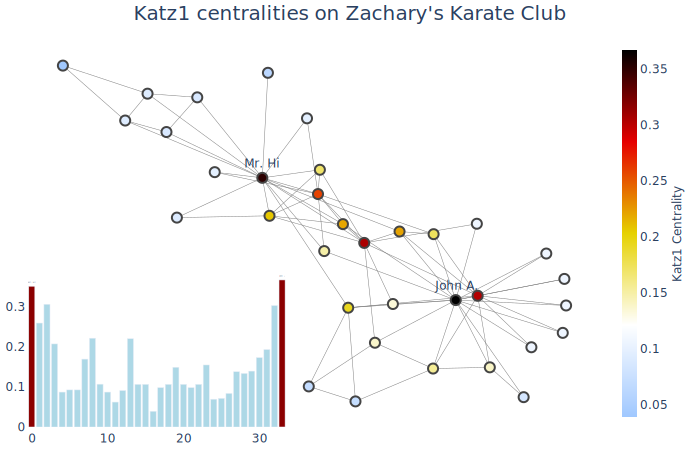

In [39]:
plot_network(G, figure_title='Katz1 centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='katz1',
             colorscale_title='Katz1 Centrality',
             seed=1025)

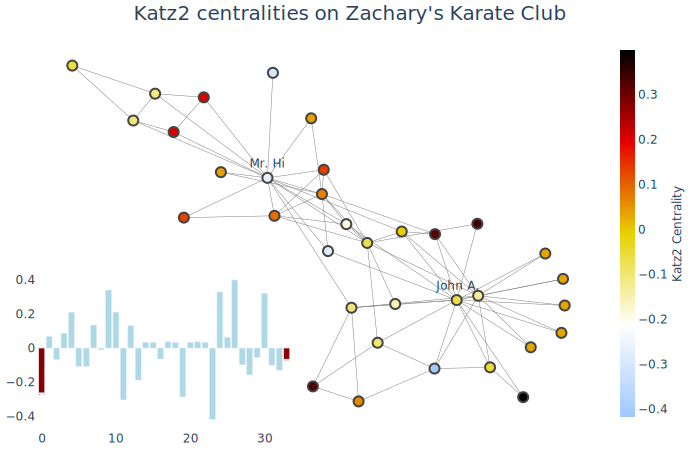

In [40]:
plot_network(G, figure_title='Katz2 centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='katz2',
             colorscale_title='Katz2 Centrality',
             seed=1025)

#### 1.2.3 Betweenness centrality

In [41]:
def Betweenness(G):
    return list(nx.betweenness_centrality(G).values())

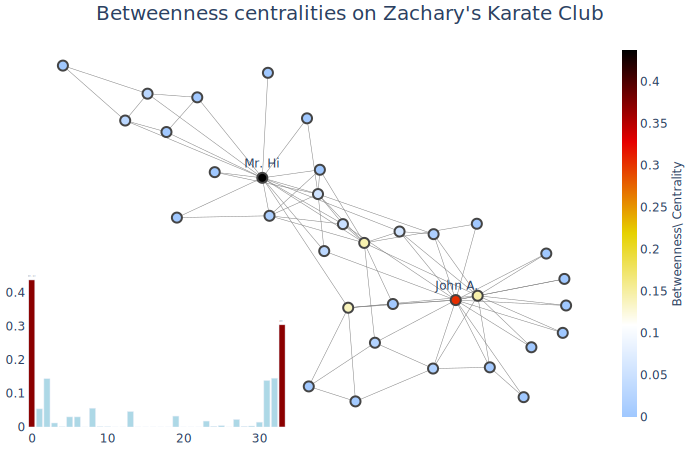

In [42]:
plot_network(G, figure_title='Betweenness centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='betweenness',
             colorscale_title='Betweenness\ Centrality',
             seed=1025)

## 2. **Iterative refinement centralities**

The influence of a node is not only determined by the number of its neighbors, but also determined by the influence of its neighbors, known as the **mutual enhancement effect**.

#### 2.1 Eigenvector centrality

There are n eigenvectors and we choose the vec according to the maximal eigenval.

$$
\mathbf{A} x = \lambda x
$$

In [43]:
import numpy as np
import numpy.linalg

def Eigenvector1(G):
    """get eigenvector centrality of network G
    
    """
    m = nx.to_numpy_array(G)
    vals, vecs = numpy.linalg.eigh(m)
    vec1 = vecs.T[np.argmax(vals)]

    return vec1

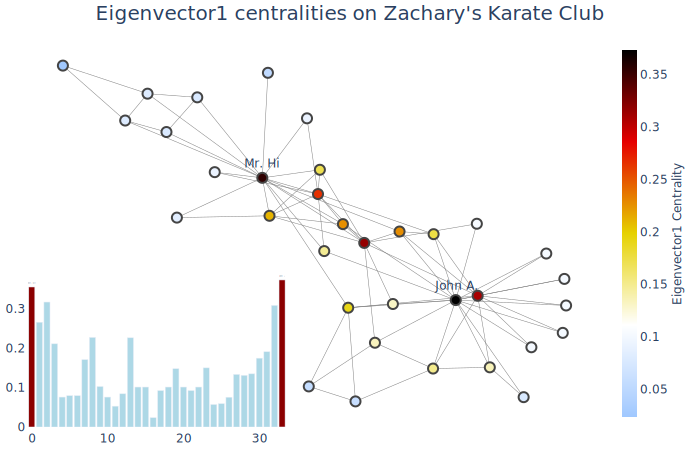

In [44]:
plot_network(G, figure_title='Eigenvector1 centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='eigenvector1',
             colorscale_title='Eigenvector1 Centrality',
             seed=1025)

When we choose the second maximal eigenvalue, it arise with negative eigenvals.

In [45]:
import numpy as np
import numpy.linalg

def Eigenvector2(G):
    """get eigenvector centrality of network G
    
    """
    m = nx.to_numpy_array(G)
    vals, vecs = numpy.linalg.eigh(m)
    vals[np.argmax(vals)] = 0
    vec2 = vecs.T[np.argmax(vals)]

    return vec2

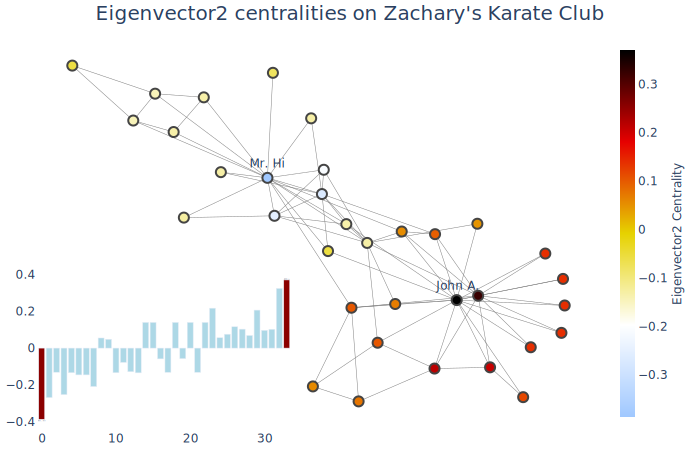

In [46]:
plot_network(G, figure_title='Eigenvector2 centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='eigenvector2',
             colorscale_title='Eigenvector2 Centrality',
             seed=1025)

#### 2.2 PageRank centrality

In [47]:
def PageRank(G):
    """get pagerank centrality of network G
    
    """
    pr = nx.pagerank(G)

    return list(pr.values())

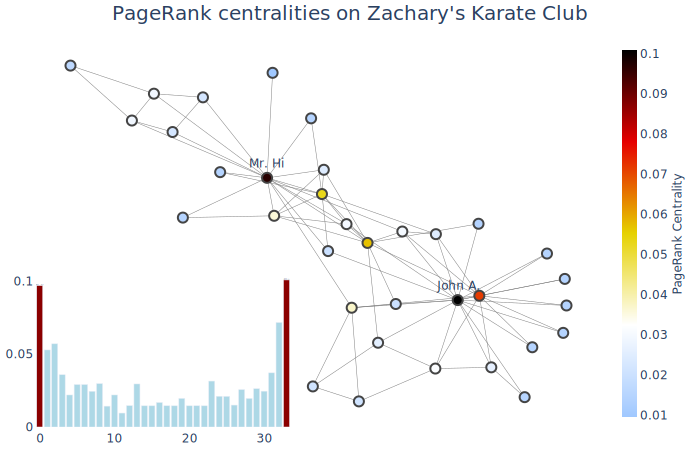

In [48]:
plot_network(G, figure_title='PageRank centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='pagerank',
             colorscale_title='PageRank Centrality',
             seed=1025)

#### 2.3 HITS centrality

In [49]:
import numpy as np
import numpy.linalg

def HITS1(G):
    """get HITS authority centrality of network G
    
    """
    m = nx.to_numpy_array(G)
    vals, vecs = numpy.linalg.eigh(np.dot(m, m.T))
    vec1 = vecs.T[np.argmax(vals)]
    if vec1[0]< 0:
        vec1 = [i * -1 for i in vec1]

    return vec1

def HITS2(G):
    """get HITS centrality of network G
    
    """
    m = nx.to_numpy_array(G)
    vals, vecs = numpy.linalg.eigh(np.dot(m.T, m))
    vec1 = vecs.T[np.argmax(vals)]
    if vec1[0]< 0:
        vec1 = [i * -1 for i in vec1]

    return vec1

Authority
$$
\bf{AA^T = \lambda x}
$$

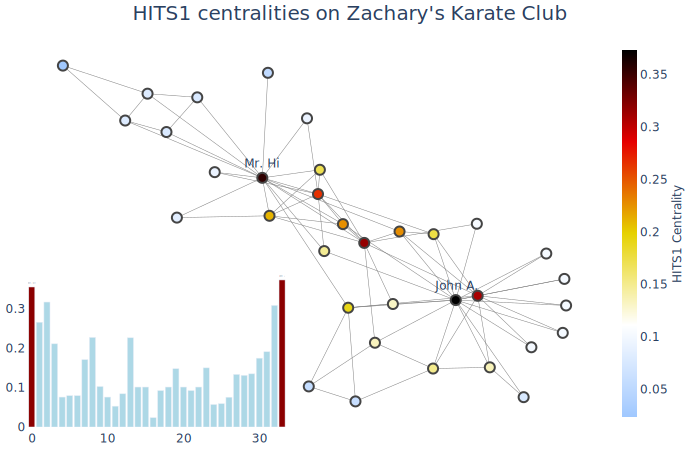

In [50]:
plot_network(G, figure_title='HITS1 centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='HITS1',
             colorscale_title='HITS1 Centrality',
             seed=1025)

In [51]:
import numpy as np
import numpy.linalg

def HITS1(G):
    """get HITS centrality of network G
    
    """
    m = nx.to_numpy_array(G)
    vals, vecs = numpy.linalg.eigh(np.matmul(m, m.T))
    vec1 = vecs.T[np.argmax(vals)]
    if vec1[0]< 0:
        vec1 = [i * -1 for i in vec1]

    return vec1

def HITS2(G):
    """get HITS centrality of network G
    
    """
    m = nx.to_numpy_array(G)
    vals, vecs = numpy.linalg.eigh(np.matmul(m.T, m))
    vec1 = vecs.T[np.argmax(vals)]
    if vec1[0]< 0:
        vec1 = [i * -1 for i in vec1]

    return vec1

Hub
$$
\bf{A^TA = \lambda x}
$$

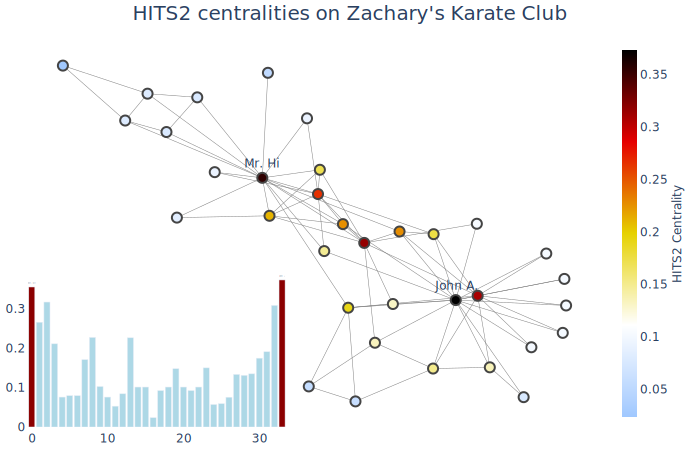

In [52]:
plot_network(G, figure_title='HITS2 centralities on Zachary\'s Karate Club',
             marker_text=marker_text, colorscale='Blackbody',
             centrality_type='HITS2',
             colorscale_title='HITS2 Centrality',
             seed=1025)